<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('/content/employee_data (1) 2.csv')

In [5]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [6]:
df.isnull()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,False,False,True,False,False,True,False,False,False,False
1,False,False,True,True,False,True,False,False,False,False
2,False,False,True,False,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False
4,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14244,False,False,True,False,False,True,False,False,False,False
14245,False,False,True,False,False,True,False,False,False,False
14246,False,False,False,False,False,True,False,False,False,False
14247,False,False,True,False,False,True,False,False,False,False


In [7]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [8]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

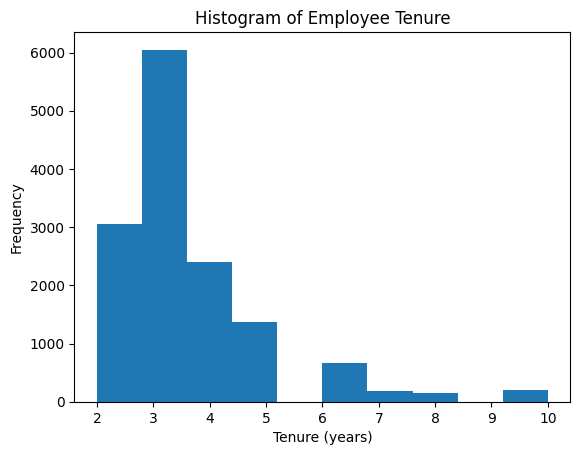

In [9]:
tenure = df["tenure"]
plt.hist(tenure, bins=10) # You can change the number of bins as you like
plt.xlabel("Tenure (years)") # Add x-axis label
plt.ylabel("Frequency") # Add y-axis label
plt.title("Histogram of Employee Tenure") # Add title
plt.show() # Show the plot

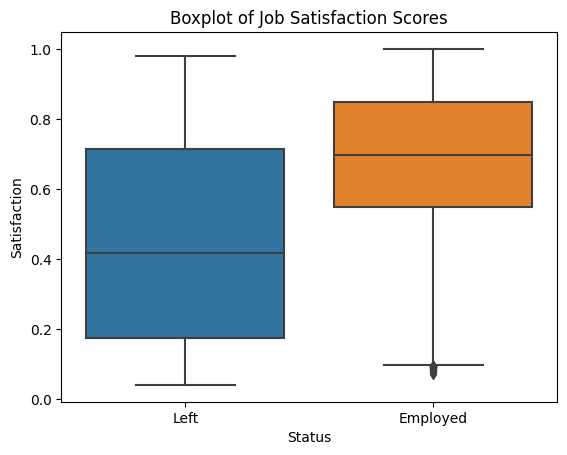

In [10]:
satisfaction = df["satisfaction"]
status = df["status"]
sns.boxplot(x="status", y="satisfaction", data=df)
plt.xlabel("Status") # Add x-axis label
plt.ylabel("Satisfaction") # Add y-axis label
plt.title("Boxplot of Job Satisfaction Scores") # Add title
plt.show() # Show the plot

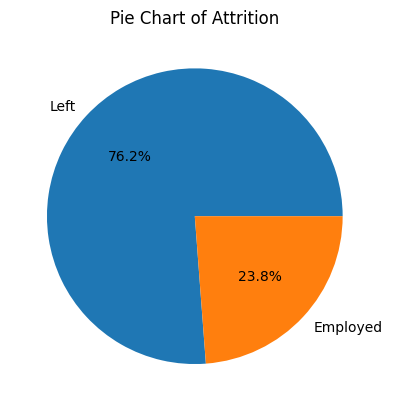

In [11]:
status = df["status"]

# Plot the pie chart
plt.pie(status.value_counts(), labels=status.unique(), autopct='%1.1f%%')
plt.title("Pie Chart of Attrition")
plt.show()

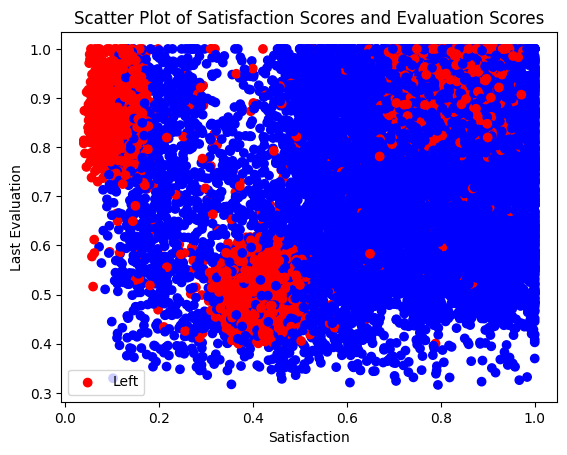

In [12]:
plt.scatter(df["satisfaction"], df["last_evaluation"], c=df["status"].map({"Left": "red", "Employed": "blue"}))
plt.xlabel("Satisfaction") # Add x-axis label
plt.ylabel("Last Evaluation") # Add y-axis label
plt.title("Scatter Plot of Satisfaction Scores and Evaluation Scores") # Add title
plt.legend(["Left", "Employed"]) # Add legend
plt.show() # Show the plot

In [13]:
for col in ['tenure', 'satisfaction']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()


avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [15]:
df["status"] = df["status"].map({"Left": 0, "Employed": 1})

In [16]:
df["status"].dtype

dtype('int64')

In [17]:
# Select the features and the target variable
X = df[["tenure", "satisfaction", "n_projects"]] # Features
y = df["status"] # Target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Build a decision tree classifier to predict employee attrition
# Use entropy as the split criterion and set the maximum depth to 3 for tree pruning
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train) # Train the classifier on the training set


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
# Predict the labels of the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance using accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.91


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train) # Train the classifier on the training set

DecisionTreeClassifier()

In [23]:
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model performance using accuracy score
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"The accuracy of the decision tree classifier with Gini impurity is {acc_gini:.2f}")

The accuracy of the decision tree classifier with Gini impurity is 0.94


In [24]:
# Build a decision tree classifier with entropy as the split criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train) # Train the classifier on the training set

# Predict the labels of the testing set using entropy
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model performance using accuracy score
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"The accuracy of the decision tree classifier with entropy is {acc_entropy:.2f}")


The accuracy of the decision tree classifier with entropy is 0.93


In [28]:
fr.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Not Attrited", "Attrited"], filled=True)
plt.title("Dom sklearn import tree pltecision Tree Structure")
plt.show()

NameError: ignored